**2.7** **IVP INTEGRO-DIFERENCIAL**

$$\ddot{y}(t) = \cos(y(t)) \dot{y}(t) - y(t)$$


$$y(0)=1$$

Adicionalmente se conoce $$\dot{y}(10) = 0.1$$

**a**) Proponga un algoritmo basado en el método de Euler para resolver el IVP en la ecuación dada.


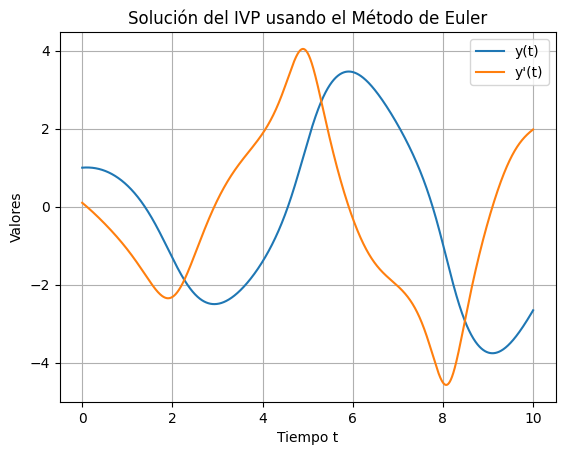

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Delta_t = 0.001
t_final = 10
n_steps = int(t_final / Delta_t)

t = np.linspace(0, t_final, n_steps + 1)
y = np.zeros(n_steps + 1)
y_dot = np.zeros(n_steps + 1)

y[0] = 1
y_dot[0] = 0.1

for i in range(n_steps):
    y_ddot = np.cos(y[i]) * y_dot[i] - y[i]
    y_dot[i + 1] = y_dot[i] + y_ddot * Delta_t
    y[i + 1] = y[i] + y_dot[i] * Delta_t

plt.plot(t, y, label='y(t)')
plt.plot(t, y_dot, label='y\'(t)')
plt.xlabel('Tiempo t')
plt.ylabel('Valores')
plt.legend()
plt.title('Solución del IVP usando el Método de Euler')
plt.grid(True)
plt.show()


$$\ddot{u}(x) - \sin(v(x))$$
$$\ddot{v}(x) + \cos(u(x))$$
$$u(-1) = 1$$
$$\dot{u}(1) = 0$$
$$\dot{v}(-1) = 0$$
$$v(1) = 0$$


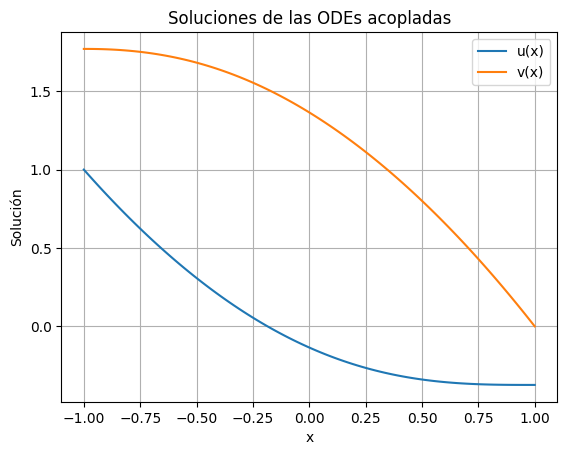

In [14]:
import numpy as np
from scipy.optimize import fsolve

# Parámetros
N = 100  # Número de puntos
x = np.linspace(-1, 1, N)
h = 2/(N-1)

# Función para el sistema de ecuaciones
def equations(vars):
    u = vars[:N]
    v = vars[N:]
    
    eqs = np.zeros(2 * N)
    
    # Ecuaciones diferenciales discretizadas
    eqs[:N-2] = (u[2:N] - 2*u[1:N-1] + u[0:N-2]) / h**2 - np.sin(v[1:N-1])
    eqs[N-2:-4] = (v[2:N] - 2*v[1:N-1] + v[0:N-2]) / h**2 + np.cos(u[1:N-1])
    
    # Condiciones de frontera
    eqs[-4] = u[0] - 1
    eqs[-3] = (u[-1] - u[-2]) 
    eqs[-2] = (v[1] - v[0]) 
    eqs[-1] = v[-1]
    
    return eqs

# Valores iniciales
w0 = np.zeros(2*N)
w0[0]=1
w1 = np.zeros(2*N)
eps=1e-8
for i in np.arange(20):
    Jw = lambda w: (equations(w0+eps*w)-equations(w0))/eps
    w1 = NewtonKrylov(J)
initial_guess = np.concatenate((u0, v0))

# Solución usando fsolve
solution = fsolve(equations, initial_guess)
u_sol = solution[:N]
v_sol = solution[N:]

# Resultados
import matplotlib.pyplot as plt

plt.plot(x, u_sol, label='u(x)')
plt.plot(x, v_sol, label='v(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Solución')
plt.title('Soluciones de las ODEs acopladas')
plt.grid(True)
plt.show()
